##Import Libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import math

##Import Dataset

In [2]:
training = pd.read_csv('train.csv')
training.head()
training = training.select_dtypes(exclude=['string'])
training = training.drop(['Id'], axis=1)

missing_cols_train = [col for col in training.columns if training[col].isnull().any()]
print(missing_cols_train)

training = training.drop(missing_cols_train, axis=1)


#training.tail()

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


##Determining categorical variables

In [3]:
s = (training.dtypes == 'object')
#s = (training.dtypes == 'object' and training.dtypes == 'string')
object_cols_train = list(s[s].index)

print(training.columns)

print('Categorical variables:')
print(object_cols_train)

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')
Categorical variables:
['MSZoning', 'Street', 'LotShap

##One Hot Encoder 

In [4]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(training[object_cols_train]))

OH_cols.index = training.index

num_training = training.drop(object_cols_train, axis=1)

money = training.SalePrice
training = training.drop(['SalePrice'], axis=1)

training = pd.concat([num_training, OH_cols], axis=1)

training = pd.concat([training, money], axis=1)
print(training)

      MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0             60     8450            7            5       2003          2003   
1             20     9600            6            8       1976          1976   
2             60    11250            7            5       2001          2002   
3             70     9550            7            5       1915          1970   
4             60    14260            8            5       2000          2000   
...          ...      ...          ...          ...        ...           ...   
1455          60     7917            6            5       1999          2000   
1456          20    13175            6            6       1978          1988   
1457          70     9042            7            9       1941          2006   
1458          20     9717            5            6       1950          1996   
1459          20     9937            5            6       1965          1965   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF

##Splitting Data

In [5]:
X = training.iloc[:,:-1].values
y = training.iloc[:,-1].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state = 0)

##Training Models 

1. Support Vector Regression
2. Decision Tree Regression
3. Random Forest Regression
4. XGBoost

In [7]:
from sklearn.svm import SVR
model1 = SVR(kernel = 'rbf')
model1.fit(X_train, y_train)

SVR()

In [8]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor(random_state = 0)
model2.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [9]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(n_estimators = 10, random_state = 0)
model3.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [10]:
from xgboost import XGBRegressor as xgb
model4 = xgb(n_estimators=1000, learning_rate=0.1)
model4.fit(X_train, y_train)

/Users/johnnycameron/opt/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

##Checking Results

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)

#np.set_printoptions(precision=1)
#print(np.concatenate((y_pred2.reshape(len(y_pred2), 1), y_test.reshape(len(y_test), 1)), 1))

####MAE

1. 16130
2. 718

In [12]:
from sklearn.metrics import mean_absolute_error
mae1 = mean_absolute_error(y_test, y_pred1)
mae2 = mean_absolute_error(y_test, y_pred2)
mae3 = mean_absolute_error(y_test, y_pred3)
mae4 = mean_absolute_error(y_test, y_pred4)

print("Support Vector Regression MAE: {}".format(round(mae1, 2)))
print("Decision Tree MAE: {}".format(round(mae2, 2)))
print("Random Forest Regression MAE: {}".format(round(mae3, 2)))
print("XGBoost Regression MAE: {}".format(round(mae4, 2)))

Support Vector Regression MAE: 55454.7
Decision Tree MAE: 1327.09
Random Forest Regression MAE: 1033.48
XGBoost Regression MAE: 560.77


####MSE

1. 27241
2. 1515

In [13]:
from sklearn.metrics import mean_squared_error

mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = math.sqrt(mse1)
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = math.sqrt(mse2)
mse3 = mean_squared_error(y_test, y_pred3)
rmse3 = math.sqrt(mse3)
mse4 = mean_squared_error(y_test, y_pred4)
rmse4 = math.sqrt(mse4)

print("Support Vector Regression RMSE: {}".format(round(rmse1, 2)))
print("Decision Tree Regression RMSE: {}".format(round(rmse2, 2)))
print("Random Forest RMSE: {}".format(round(rmse3, 2)))
print("XGBoost RMSE: {}".format(round(rmse4, 2)))

Support Vector Regression RMSE: 85001.99
Decision Tree Regression RMSE: 9373.95
Random Forest RMSE: 6113.18
XGBoost RMSE: 1343.23


##Visualization 

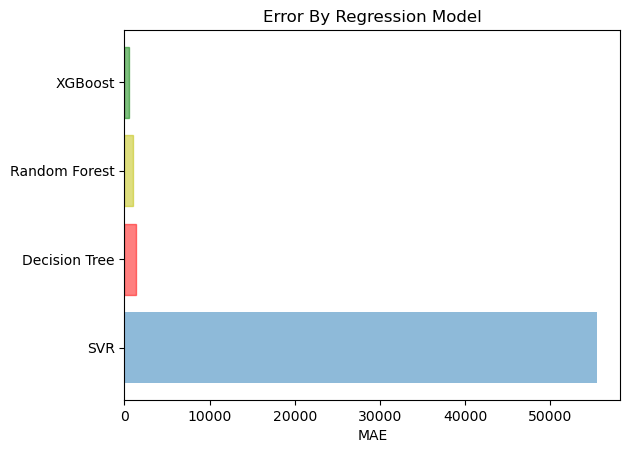

In [26]:
regressors = ('SVR', 'Decision Tree', 'Random Forest', 'XGBoost')
y_pos = np.arange(len(regressors))
performance = [mae1, mae2, mae3, mae4]
barChart = plt.barh(y_pos, performance, align='center', alpha=0.5)
barChart[1].set_color('r')
barChart[2].set_color('y')
barChart[3].set_color('g')
plt.yticks(y_pos, regressors)
plt.xlabel('MAE')
plt.title('Error By Regression Model')

plt.savefig(fname='Regressor1_MAE.png', format='png', bbox_inches='tight')
plt.show()

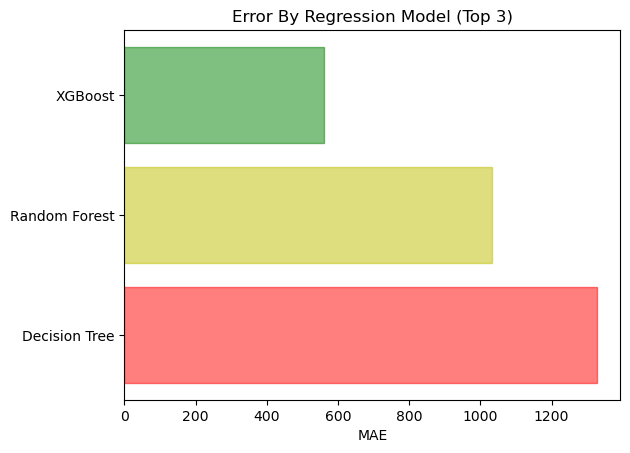

In [27]:
regressors = ('Decision Tree', 'Random Forest', 'XGBoost')
y_pos = np.arange(len(regressors))
performance = [mae2, mae3, mae4]
barChart = plt.barh(y_pos, performance, align='center', alpha=0.5)
barChart[0].set_color('r')
barChart[1].set_color('y')
barChart[2].set_color('g')
plt.yticks(y_pos, regressors)
plt.xlabel('MAE')
plt.title('Error By Regression Model (Top 3)')

plt.savefig(fname='Regressor2_MAE.png', format='png', bbox_inches='tight')
plt.show()

##Save Model

In [47]:
#import pickle 
#from sklearn.externals import joblib
#filename = 'house_model.pkl'
#joblib.dump(model, filename)